# GOOGL
Google is a multinational technology company specializing in Internet-related services and products, which include online advertising technologies, a search engine, cloud computing, software, and hardware. It is considered one of the Big Five technology companies, alongside Amazon, Apple, Microsoft, and Facebook.

## Settings

In [1]:
# Root Settings
import sys
from pathlib import Path

# Add project root to path
sys.path.append(str(Path().resolve().parent))

# Load basic packages
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

# Custom functions using sec-edgar-api and yfinance
from finance import (
    get_facts,
    annual_net_income, plot_annual_net_income, plot_net_income_growth,
    annual_dividends, plot_annual_dividends, plot_dividends_growth,
    historical_price
)

# Style settings
plt.style.use('ggplot')
plt.rc('axes', unicode_minus=False)
plt.rcParams.update({
    'axes.titlesize': 20,       # Plot titles
    'axes.labelsize': 16,       # X/Y axis labels
    'xtick.labelsize': 14,      # X-axis tick labels
    'ytick.labelsize': 16,      # Y-axis tick labels
    'legend.fontsize': 12,      # Legend (if used)
    'figure.titlesize': 22,     # Main figure title (if used)
})

## Company Information

In [2]:
ticker = 'GOOGL'
facts = get_facts(ticker=ticker)

## Income

The net income of Google has reached over $100 billion in 2024 which is a significant increase from the previous year. It's more than that of Microsoft and Apple, while the market cap of Google is less than that of Microsoft and Apple.

In [3]:
df_net_income = annual_net_income(facts)
df_net_income[0].tail(5)

,date,net_income,year
7,2020-12-31,40269000000,2020
8,2021-12-31,76033000000,2021
9,2022-12-31,59972000000,2022
10,2023-12-31,73795000000,2023
11,2024-12-31,100118000000,2024


## Income Growth (%)

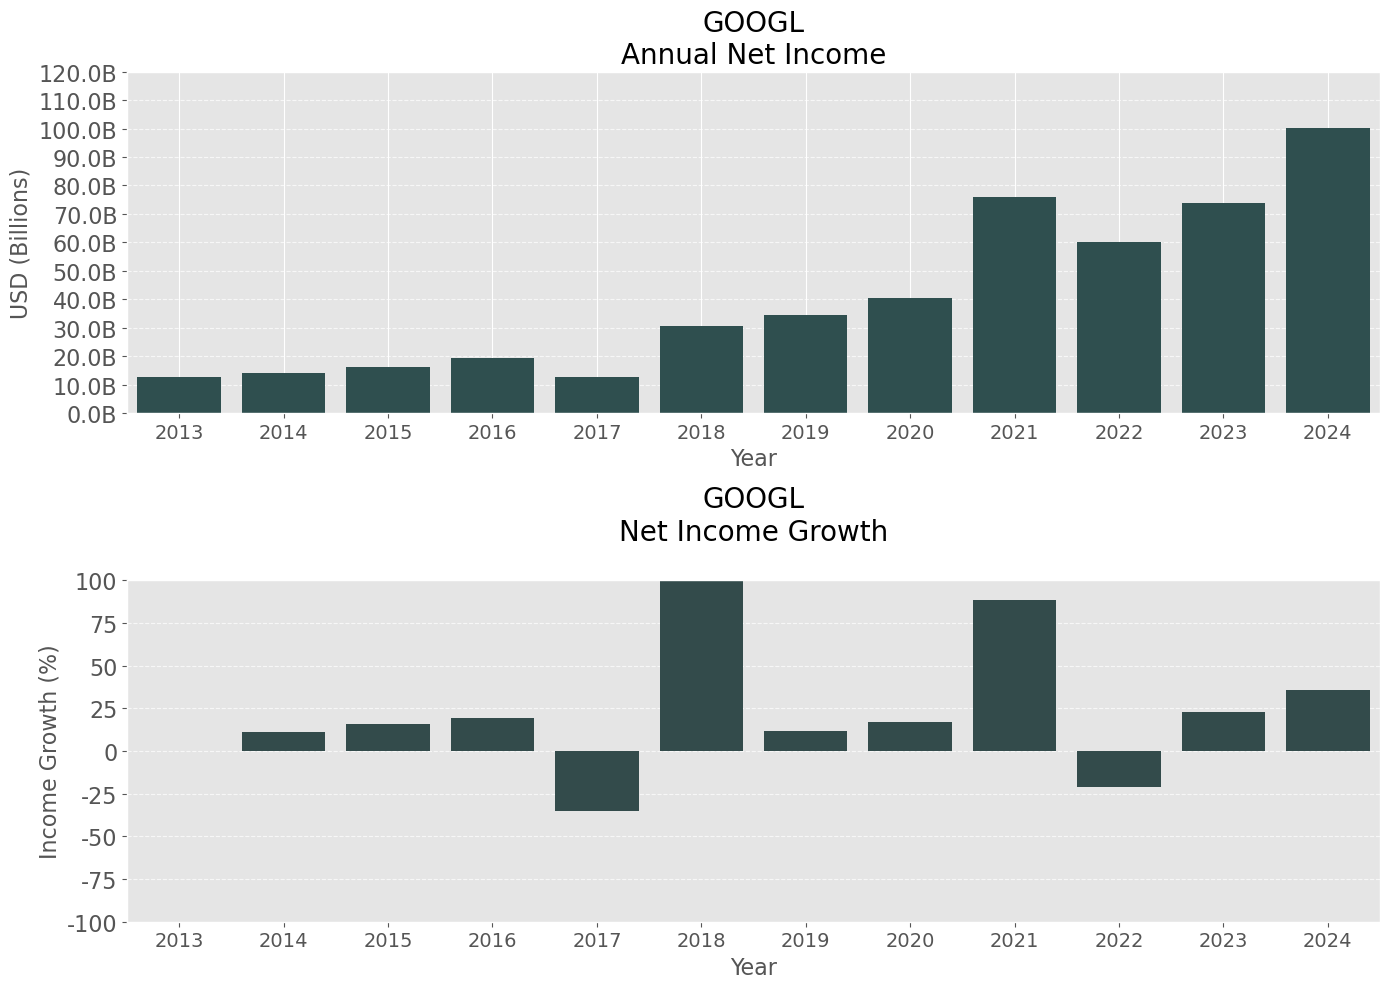

In [4]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

plot_annual_net_income(df_net_income[0], ticker=ticker, unit='B', ystep=100e8, ax=axes[0])
plot_net_income_growth(df_net_income[0], ticker=ticker, ymin=-100, ymax=100, ystep=25, ax=axes[1])

# Show x-ticks on upper graph too
axes[0].tick_params(labelbottom=True)

plt.tight_layout()
plt.show()

## Price

The stock price rose up over $200 recently, but has soon dropped to $150. The stock price is currently at a low point, which may be a good time to buy. 

The stock price is at the level of $150, which is same as the price in early 2022 and early 2024. Company earns about 20% more than it did in 2022, so the stock price is at a low point.

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


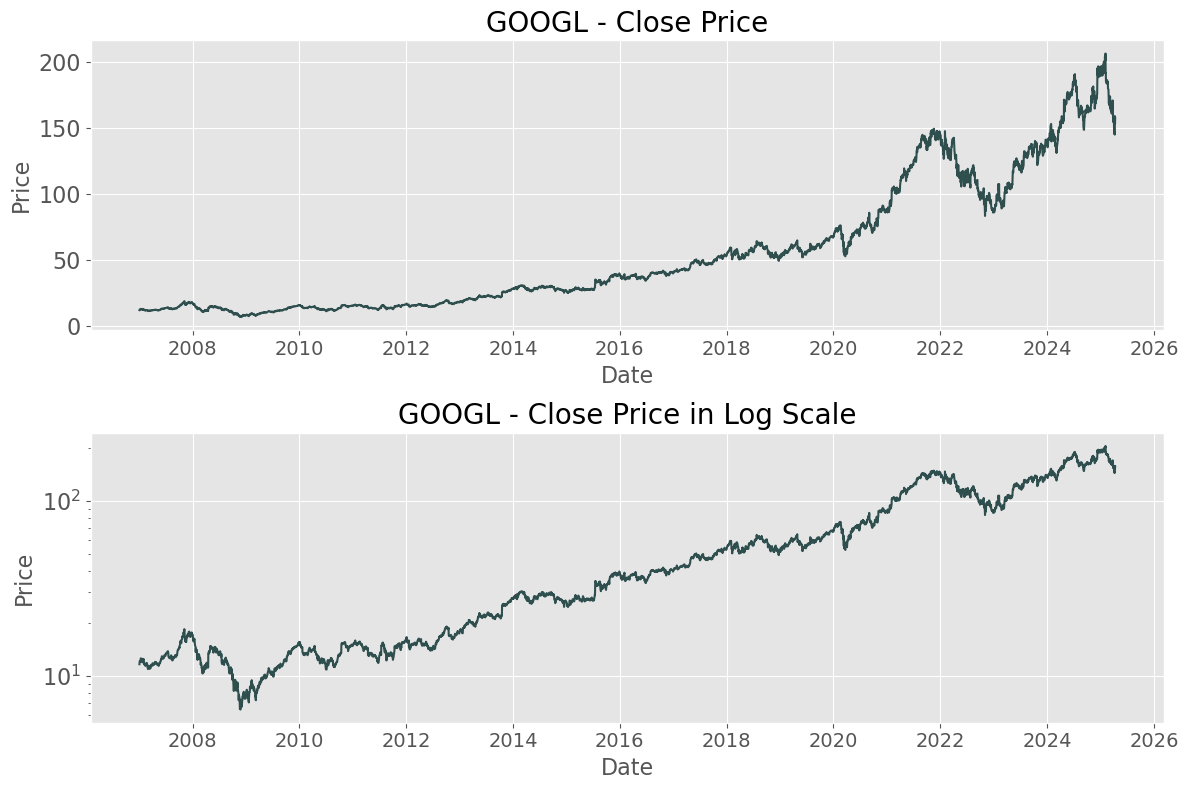

In [5]:
import matplotlib.pyplot as plt
from finance import historical_price

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

historical_price(ticker, start="2007", column="Close", scale='linear', ax=axes[0])
historical_price(ticker, start="2007", column="Close", scale='log', ax=axes[1])

axes[0].tick_params(labelbottom=True)
plt.tight_layout()
plt.show()


## Dividends

> *"Do you know the only thing that gives me pleasure? It's to see my dividends coming in."*  
> 
> *John D. Rockefeller, 1901*

GOOGL is not known for its dividends, but has recently started to pay a small dividend. The company has a history of reinvesting its profits into research and development, which has fueled its growth in the technology sector.

In [6]:
from finance import annual_dividends

df_dividends = annual_dividends(facts)
df_dividends[0].tail(5)

,date,dividends,year
3,2016-12-31,0,2016
4,2017-12-31,0,2017
5,2022-12-31,0,2022
6,2023-12-31,0,2023
7,2024-12-31,7363000000,2024


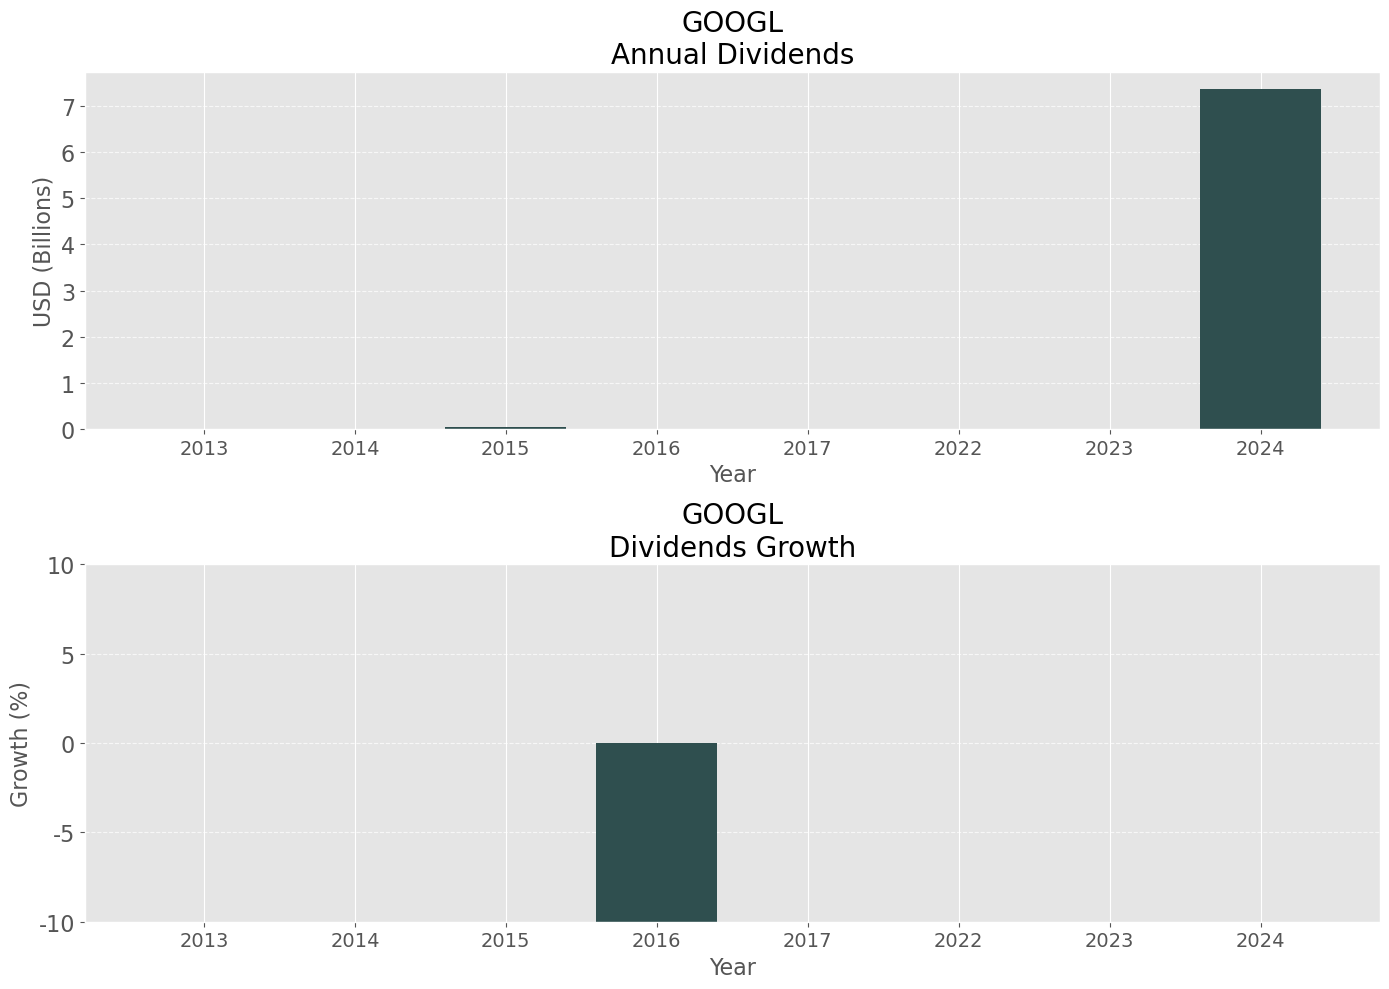

In [7]:
from finance import plot_annual_dividends, plot_dividends_growth

fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

plot_annual_dividends(df_dividends[0], ticker=ticker, unit='B', ax=axes[0])
plot_dividends_growth(df_dividends[0], ticker=ticker, ymin=-10, ymax=10, ystep=5, ax=axes[1])

axes[0].tick_params(labelbottom=True)
plt.tight_layout()
plt.show()

## P/E Ratio

P/E ratio in this analysis is different from the P/E ratio in other analysis. Usually they use Rolling 12-month earnings (TTM) or Forward 12-month earnings (FY1). In this analysis, we use the latest annual earnings. 

P/E Ratio is around 10, which means a bargain. The P/E ratio is lower than that of Microsoft and Apple, which is around 20. The P/E ratio is also lower than the average P/E ratio of the S&P 500, which is around 25.

It mean the stock price is cheap, only if the company can keep the same level of earnings.

In [8]:
price = yf.download(ticker)
share = yf.Ticker(ticker).info['sharesOutstanding']

market_cap = price['Close'] * share
pe = (market_cap.iloc[-1] / df_net_income[0].net_income.iloc[-1]).iloc[0]

print(f"Latest P/E Ratio for {ticker}: {pe:.2f}")

[*********************100%***********************]  1 of 1 completed


Latest P/E Ratio for GOOGL: 9.16


[*********************100%***********************]  1 of 1 completed


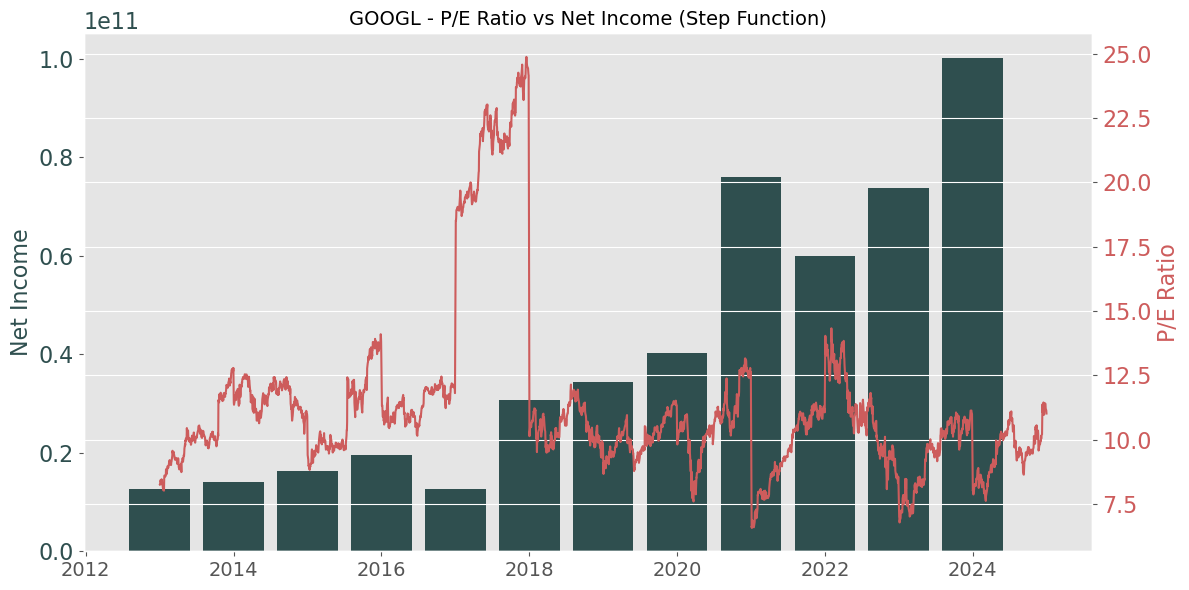

In [10]:
import yfinance as yf

price = yf.download(ticker)
share = yf.Ticker(ticker).info['sharesOutstanding']

market_cap = price['Close'] * share

df = df_net_income[0].copy()
df = df[df['year'] >= market_cap.index.min().year]
df['effective_date'] = pd.to_datetime(df['year'], format='%Y')  # Jan 1 of next year

# Daily P/E Ratio using step function for annual income
step_dates = pd.to_datetime(df['date'])
step_income = df.set_index('date')['net_income']

# Create step series aligned with price_df
pe_df = market_cap.copy()
pe_df['year'] = pe_df.index.year
pe_df['net_income'] = pe_df['year'].map(df.set_index('year')['net_income'])
pe_df['pe'] = pe_df[ticker] / pe_df['net_income']

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Net Income (right y-axis)
ax1.bar(df['effective_date'], df['net_income'], width=300, color='darkslategray')
ax1.set_ylabel('Net Income', color='darkslategray')
ax1.tick_params(axis='y', labelcolor='darkslategray')
ax1.grid(False)

# P/E Ratio (left y-axis)
ax2 = ax1.twinx()
ax2.plot(pe_df.index, pe_df['pe'], color='indianred', label='P/E Ratio')
ax2.set_ylabel('P/E Ratio', color='indianred')
ax2.tick_params(axis='y', labelcolor='indianred')

# Title and x-label
plt.title(f'{ticker} - P/E Ratio vs Net Income (Step Function)', fontsize=14)
ax2.set_xlabel('Date')

plt.tight_layout()
plt.show()

## Conclusion

**BUY**

The stock price is at a low point, which may be a good time to buy. The P/E ratio is lower than that of Microsoft and Apple, which means the stock price is cheap. 

The net income of Google has reached over $100 billion in 2024 which is a significant increase from the previous year. It's more than that of Microsoft and Apple, while the market cap of Google is less than that of Microsoft and Apple.

Check whether the growth in net income is one-shot or not. If the growth is one-shot, the stock price may drop in the future.